Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_22 (Dense)             (None, 84)               

Text(0, 0.5, 'Multiclass Cross Entropy')

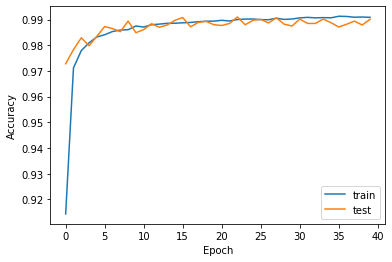

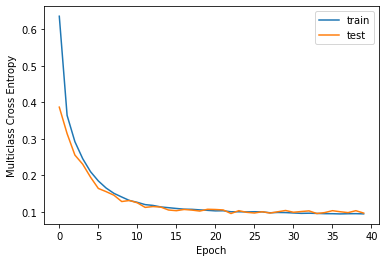

In [16]:
# EE569 HOMEWORK ASSIGNMENT 5
# DATE: Aprile 14th 2021
# NAME: Siyu Li
# ID:2455870216
# E-mail:lisiyu@usc.edu

### training and performance evaluation on mnist
### adjust the parameter before training according to your need, optimal parameter setting is stated in report an below
import tensorflow as tf
import numpy as np
import keras
from tensorflow.keras.layers import Flatten, MaxPooling2D, Conv2D, Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.initializers import Ones, he_normal, GlorotNormal
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
from keras.models import Sequential

# training parameter
mini_batch_size = 64
number_epochs = 40
learning_rate = 0.0005
number_class=10

kernel_initial = Ones(), he_normal(), GlorotNormal()
kernel_regularizer = l1(0.001), l2(0.001)
# load data
(train_data, train_label), (test_data, test_label) = mnist.load_data()

img_rows=np.shape(train_data)[1]
img_cols=np.shape(train_data)[2]

train_data = train_data.reshape(train_data.shape[0], img_rows, img_cols, 1)
test_data = test_data.reshape(test_data.shape[0], img_rows, img_cols, 1)

train_data = np.pad(train_data,((0,0), (2,2), (2,2), (0,0)), 'constant')
test_data = np.pad(test_data,((0,0), (2,2), (2,2), (0,0)), 'constant')

##np.shape(train_data)
train_label = to_categorical(train_label, number_class)
test_label = to_categorical(test_label, number_class)
# normalize data
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255
###np.shape(train_data) # (60000,28,28)
###input_shape = np.shape(train_data)[1:] # python start from zero, the zero th is the number of images
####K.image_data_format()

###build sequential model
model = keras.Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5), kernel_initializer=kernel_initial[1], kernel_regularizer=kernel_regularizer[1], activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D())

model.add(Conv2D(filters=16, kernel_size=(5, 5), kernel_initializer=kernel_initial[1], kernel_regularizer=kernel_regularizer[1], activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(units=120, kernel_initializer=kernel_initial[1], kernel_regularizer=kernel_regularizer[1], activation='relu'))

model.add(Dense(units=84, kernel_initializer=kernel_initial[1], kernel_regularizer=kernel_regularizer[1], activation='relu'))

model.add(Dense(units=10, kernel_initializer=kernel_initial[1], kernel_regularizer=kernel_regularizer[1], activation = 'softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),#SGD(learning_rate=learning_rate),
              metrics=['accuracy'])

model.summary()
### training
training_process=model.fit(train_data, train_label,
          batch_size=mini_batch_size,
          epochs=number_epochs,
          verbose=1,
          validation_data=(test_data, test_label))

scores = model.evaluate(test_data, test_label, verbose=0)

print('LeNet 5 Training Error: %.4f%%' % (100-training_process.history['accuracy'][number_epochs-1]*100))
print('LeNet 5 Training Loss: %.4f%%' % (training_process.history['loss'][number_epochs-1]*100))
print('LeNet 5 Training Accuracy: %.4f%%' % (training_process.history['accuracy'][number_epochs-1]*100))

print('LeNet 5 Test Error: %.4f%%' % (100-scores[1]*100))
print('LeNet 5 Test Loss: %.4f%%' % (scores[0]*100))
print('LeNet 5 Test Accuracy: %.4f%%' % (scores[1]*100))

plt.figure()
plt.plot(training_process.history['accuracy'], label='train')
plt.plot(training_process.history['val_accuracy'], label='test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.figure()
plt.plot(training_process.history['loss'], label='train')
plt.plot(training_process.history['val_loss'], label='test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Multiclass Cross Entropy')